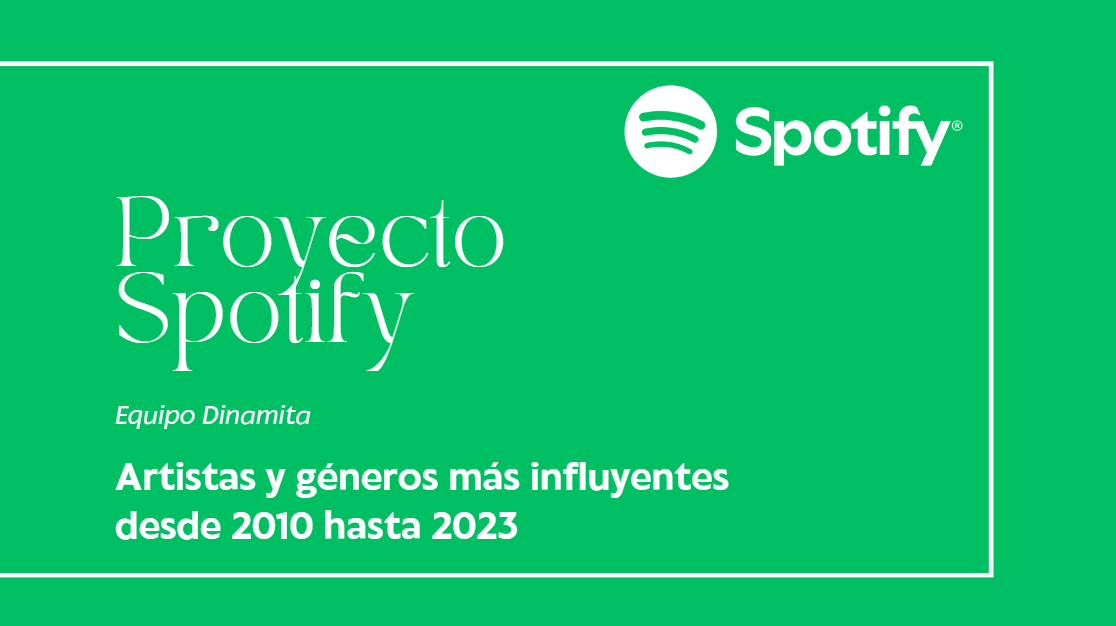

**SPOTIFY** *La influencia de los artistas y de los géneros en la última década*

**HISTORIA:** SOMOS UNA EMPRESA DEDICADA A LA INDUSTRIA MUSICAL y
nuestro jefe nos ha mandado a investigar que canciones han sido las mas escuchadas en estos ultimos 10 años. Como empresa dedicada a la música nuestro objetivo es desarrollar el documento, filtrarlo y limpiarlo para obtener unos resultados válidos y útiles que nos permita poder utilizarlos para poder comprar y obtener bases y herramietas musicales con las que poder llegar a un lugar privilegiado en la industria. Para ello este documentos de canciones nos ayudara a comprobar que artista o artistas han sido los más inlfuyentes e importantes para la industria musical y así poder utilizar.

ANALISIS Y VISUALIZACION DE DATOS

Para empezar tuvimos que revisar y limpiar la base de datos que nos proporsionaron utilizamos "Pandas" para mayor facilidad. Usando codigos como "read" y "info" para empezar analizar los datos.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/spotify_full_list_20102023.csv")
df
#que columnas tiene
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10441 non-null  int64  
 1   Artist and Title  10441 non-null  object 
 2   Artist            10441 non-null  object 
 3   Streams           10441 non-null  int64  
 4   Daily             10441 non-null  int64  
 5   year              10441 non-null  float64
 6   main_genre        10110 non-null  object 
 7   genres            10110 non-null  object 
 8   first_genre       10110 non-null  object 
 9   second_genre      10110 non-null  object 
 10  third_genre       10110 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 897.4+ KB


Las columnas son las siguientes:

Index(['Unnamed: 0', 'Artist and Title', 'Artist', 'Streams', 'Daily', 'year', 'main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre'], dtype='object')

# LIMPIEZA Y PREPARACION DE COLUMNAS

Lo siguiente que hicimos fue la limpieza y reparacion de columnas comensando con la verificacion de valores nulos. Gracias al codigo "isnull" nos percatamos que las colunmas "main_genre" "genres" "first_genre" "second_genre" "third_genre" tenian 331 valores nulos.

In [ ]:

df.isnull().sum()

,0
Unnamed: 0,0
Artist and Title,0
Artist,0
Streams,0
Daily,0
year,0
main_genre,331
genres,331
first_genre,331
second_genre,331


#TRANSFORMACION DE LOS DATOS

Hemos identificado que los valores nulos pertenecen a las columnas "main_genre", "genres", "first_genre", "second_genre", "third_genre".

Una vez identificados hemos procedido a su eliminación y posteriormente relleno con el valor "Desconocido"

In [ ]:
df.dropna(inplace=True)
# Reemplazar "Unknown" por "desconocido" en todo el DataFrame
df.replace('Unknown', 'desconocido', inplace=True)

# Guardar el DataFrame limpio (opcional)
df.to_csv("/content/spotify_full_list_limpio.csv", index=False)
df

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014.0,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,desconocido
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014.0,Pop,['pop soul'],pop soul,desconocido,desconocido
3,3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,desconocido
4,4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014.0,Pop,['pop'],pop,desconocido,desconocido
...,...,...,...,...,...,...,...,...,...,...,...
10436,21611,iann dior - molly,iann dior,138112487,21049,2019.0,Hip-Hop/Rap,['melodic rap'],melodic rap,desconocido,desconocido
10437,21612,Roddy Ricch - Tip Toe,Roddy Ricch,137996968,10699,2019.0,Hip-Hop/Rap,"['melodic rap', 'rap', 'trap']",melodic rap,rap,trap
10438,21613,Sigrid - Strangers,Sigrid,137925577,15840,2019.0,Pop,"['electropop', 'norwegian pop']",electropop,norwegian pop,desconocido
10439,21614,GAMPER & DADONI - Gimme! Gimme! Gimme!,GAMPER & DADONI,137471196,60612,2019.0,Electronic/Dance,"['german dance', 'pop dance', 'tropical house']",german dance,pop dance,tropical house


# FORMULACION DE PREGUNTAS DE NEGOCIO

1.- ¿cual es el genero mas influyente?

pop

2.- ¿cual es el artista mas escuchado?

Para en encontrar los artistas mas escuchados agrupamos primero la columna "Artist" con "df.groupby" y sumamos los valores de columna "streans" por cada artista con la funcion "Sum" y por ultimo con la funcion "nlargest" ordenamos los valores de mayor a menor y nos devolvio los 10 mas grandes.

In [ ]:
#Obtener los streamings totales de cada artista
streams_artistas=df.groupby("Artist")["Streams"].sum()
mayores_streams=streams_artistas.nlargest(10)

mayores_streams

,Streams
Artist,
Taylor Swift,70049318253
Drake,58113767707
The Weeknd,49845456951
Bad Bunny,49487844806
Ed Sheeran,41700850534
Post Malone,37429365927
Billie Eilish,34544804235
Ariana Grande,34439730259
BTS,30691066285


3.-¿cual es la media de los artistas mas escuchados?

In [ ]:
# Agrupar por artista y sumar los streams totales por cada artista
streams_artistas = df.groupby("Artist")["Streams"].sum()

# Calcular la media de los streams de todos los artistas
media_streams_artistas = streams_artistas.mean()

# Mostrar la media de streams
print("La media de streams por artista es:", media_streams_artistas)

La media de streams por artista es: 1269752139.7869997


4- ¿Cual es la canción más escuchada de cada año?

In [ ]:
#Obtener el streaming mas alto diario de cada año
def cancion_stremeada_año(df):
  # Group by year and get the index of the maximum streams for each year
  cancion = df.groupby('year')['Streams'].idxmax()
  # Return the rows with the maximum streams for each year
  return df.loc[cancion]

cancion_stremeada_año(df)

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
1548,1548,Bruno Mars - Just the Way You Are,Bruno Mars,2190999113,1264628,2010.0,Pop,"['dance pop', 'pop']",dance pop,pop,desconocido
2749,2750,Adele - Someone Like You,Adele,1983143095,1258039,2011.0,Pop,['clap and tap'],clap and tap,desconocido,desconocido
1866,1866,The Neighbourhood - Sweater Weather,The Neighbourhood,3072764689,2346356,2012.0,Rock,"['modern alternative rock', 'modern rock', 'pop']",modern alternative rock,modern rock,pop
2270,2271,Vance Joy - Riptide,Vance Joy,2652765174,1476013,2013.0,Pop,"['folk-pop', 'modern rock']",folk-pop,modern rock,desconocido
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014.0,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
6624,7348,Justin Bieber - Love Yourself,Justin Bieber,2479419688,955510,2015.0,Pop,"['canadian pop', 'pop']",canadian pop,pop,desconocido
5767,6490,The Weeknd - Starboy,The Weeknd,3401512331,1695909,2016.0,R&B/Soul,"['canadian contemporary r&b', 'canadian pop', ...",canadian contemporary r&b,canadian pop,pop
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
8444,9168,Lewis Capaldi - Someone You Loved,Lewis Capaldi,3522436549,1564116,2018.0,Pop,"['pop', 'uk pop']",pop,uk pop,desconocido
9441,20616,Tones And I - Dance Monkey,Tones And I,3112873889,731006,2019.0,Pop,['australian pop'],australian pop,desconocido,desconocido


#ARTISTAS MAS REPRODUCIDOS LOS ULTIMOS 10 AÑOS

Para en encontrar los artistas mas escuchados agrupamos primero la columna "Artist" con "df.groupby" y sumamos los valores de columna "streans" por cada artista con la funcion "Sum" y por ultimo con la funcion "nlargest" ordenamos los valores de mayor a menor y nos devolvio los 10 mas grandes.

In [ ]:
#Obtener los streamings totales de cada artista
streams_artistas=df.groupby("Artist")["Streams"].sum()
mayores_streams=streams_artistas.nlargest(10)

mayores_streams

,Streams
Artist,
Taylor Swift,70049318253
Drake,58113767707
The Weeknd,49845456951
Bad Bunny,49487844806
Ed Sheeran,41700850534
Post Malone,37429365927
Billie Eilish,34544804235
Ariana Grande,34439730259
BTS,30691066285


# GENEROS MAS REPRODUCIDOS EN LOS ULTIMOS 10 AÑOS

Para en encontrar los artistas mas escuchados agrupamos primero la columna "main_genre" con "df.groupby" y sumamos los valores de columna "streans" por cada artista con la funcion "Sum" y por ultimo con la funcion "nlargest" ordenamos los valores de mayor a menor y nos devolvio los 10 mas grandes.

In [ ]:
genero_mas_escuchado=df.groupby("main_genre")["Streams"].sum()
genero_mas_escuchado.nlargest(10)

,Streams
main_genre,
Pop,1504854315141
Hip-Hop/Rap,877276031089
World/Traditional,432503750207
Electronic/Dance,206872596151
Rock,174906689358
R&B/Soul,136421076804
Indie/Alternative,68587093704
Metal,26617227425
Other,21167504023


# CANCION MAS ESCUCHADA POR AÑO


Para encontra la cancion mas escuchada por año hicimos las agrupaciones correspondientes con "df.groupby" esta vez a las columnas "year" y "streams" pero sacando la maxima con "idmax" y por ultimo invocamos la funcion "df.loc" para obtener las filas correspondientes a las canciones más stremeadas por año.

In [ ]:
#Obtener el streaming mas alto diario de cada año
def cancion_stremeada_año(df):
  # Group by year and get the index of the maximum streams for each year
  cancion = df.groupby('year')['Streams'].idxmax()
  # Return the rows with the maximum streams for each year
  return df.loc[cancion]

cancion_stremeada_año(df)

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
1548,1548,Bruno Mars - Just the Way You Are,Bruno Mars,2190999113,1264628,2010.0,Pop,"['dance pop', 'pop']",dance pop,pop,Unknown
2749,2750,Adele - Someone Like You,Adele,1983143095,1258039,2011.0,Pop,['clap and tap'],clap and tap,Unknown,Unknown
1866,1866,The Neighbourhood - Sweater Weather,The Neighbourhood,3072764689,2346356,2012.0,Rock,"['modern alternative rock', 'modern rock', 'pop']",modern alternative rock,modern rock,pop
2270,2271,Vance Joy - Riptide,Vance Joy,2652765174,1476013,2013.0,Pop,"['folk-pop', 'modern rock']",folk-pop,modern rock,Unknown
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014.0,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
6624,7348,Justin Bieber - Love Yourself,Justin Bieber,2479419688,955510,2015.0,Pop,"['canadian pop', 'pop']",canadian pop,pop,Unknown
5767,6490,The Weeknd - Starboy,The Weeknd,3401512331,1695909,2016.0,R&B/Soul,"['canadian contemporary r&b', 'canadian pop', ...",canadian contemporary r&b,canadian pop,pop
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
8444,9168,Lewis Capaldi - Someone You Loved,Lewis Capaldi,3522436549,1564116,2018.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
9441,20616,Tones And I - Dance Monkey,Tones And I,3112873889,731006,2019.0,Pop,['australian pop'],australian pop,Unknown,Unknown


# FILTLAR GENERO Y REPRODUCIONES

Para encontrar el genero mas popular "POP" creamos la variante "genero_musical" y filtramos la columna "main_genre" filtrando todas las filas donde apaezca el genero pop, emjemplo: df['main_genre'] == "Pop" luego ordenammos las canciones por streams con "sort_values"

In [ ]:
#genero_artista=df.groupby(["main_genre","Artist and Title"])["Streams"].sum()
genero_musical = df[df['main_genre'] == "Pop"]
genero_musical.sort_values(by='Streams', ascending=False)

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
8444,9168,Lewis Capaldi - Someone You Loved,Lewis Capaldi,3522436549,1564116,2018.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4073,4285,Harry Styles - As It Was,Harry Styles,3471556211,1715525,2022.0,Pop,['pop'],pop,Unknown,Unknown
9441,20616,Tones And I - Dance Monkey,Tones And I,3112873889,731006,2019.0,Pop,['australian pop'],australian pop,Unknown,Unknown
550,550,Ed Sheeran - Perfect,Ed Sheeran,3040567433,1129541,2017.0,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
...,...,...,...,...,...,...,...,...,...,...,...
5764,6347,Manuel Turizo - Éxtasis,Manuel Turizo,100651653,37712,2023.0,Pop,"['colombian pop', 'latin pop', 'reggaeton', 'r...",colombian pop,latin pop,reggaeton
2267,2268,Tom Odell - Can't Pretend,Tom Odell,100523203,40094,2012.0,Pop,['chill pop'],chill pop,Unknown,Unknown
3072,3073,Bruno Mars - Grenade,Bruno Mars,100351319,27282,2011.0,Pop,"['dance pop', 'pop']",dance pop,pop,Unknown
1864,1864,"Flo Rida - Turn Around (5,4,3,2,1)",Flo Rida,100301424,30942,2010.0,Pop,"['dance pop', 'miami hip hop', 'pop', 'pop rap']",dance pop,miami hip hop,pop


# STREAMS DE TAYLOR SWIFT EN LOS ULTIMOS 10 AÑOS

Para saber el steams de cada artista solo agrupamos las columnas "artist","year" utilizando "df.groupby" luego sumamos los valores de columna "streans" con la funcion "Sum" y "df.loc" separandolas con la etiqueta del artista.

In [ ]:
genero_escuchado= df.groupby(["Artist","year"])["Streams"].sum()
genero_escuchado.loc['Taylor Swift']

,Streams
year,
2010.0,2848303485
2012.0,3094370027
2014.0,8331412110
2015.0,188748172
2017.0,8350803236
2019.0,11673022731
2020.0,12594583173
2021.0,8795363697
2022.0,9219984753


# STREAMS DE DRAKE EN LOS ULTIMOS 10 AÑOS

In [ ]:
genero_escuchado= df.groupby(["Artist","year"])["Streams"].sum()
genero_escuchado.loc['Drake']

,Streams
year,
2010.0,823824578
2011.0,4742657891
2013.0,4373370621
2015.0,3684261413
2016.0,10116715503
2017.0,6930301616
2018.0,8997387269
2019.0,1598936703
2020.0,3665587617


# STREAMS TOTALES DEL POP 2010-2023

Para saber el steams totales del pop anuales solo agrupamos las columnas "main_genre","year" utilizando "df.groupby" luego sumamos los valores de columna "streans" con la funcion "Sum" y "df.loc" separandolas con la etiqueta del genero pop.

In [ ]:
genero_escuchado= df.groupby(["main_genre","year"])["Streams"].sum()
genero_escuchado.loc['Pop']

,Streams
year,
2010.0,48563540492
2011.0,52490993110
2012.0,73252968517
2013.0,77948090355
2014.0,102030261016
2015.0,101646595750
2016.0,118176234295
2017.0,188651558234
2018.0,153095894611


# STREAMS TOTALES DEL HIP-HOT 2010-2013

In [ ]:
genero_escuchado= df.groupby(["main_genre","year"])["Streams"].sum()
genero_escuchado.loc['Hip-Hop/Rap']

,Streams
year,
2010.0,23400108673
2011.0,21447183745
2012.0,19813714236
2013.0,24593496194
2014.0,19445781279
2015.0,55985826438
2016.0,81853690197
2017.0,108059733006
2018.0,151545715715


# STREAMS TOTALES POR CADA GENERO

In [ ]:
genero_escuchado = df.groupby("main_genre")[["Streams"]].sum()
genero_escuchado.nlargest(10, columns="Streams")

,Streams
main_genre,
Pop,1504854315141
Hip-Hop/Rap,877276031089
World/Traditional,432503750207
Electronic/Dance,206872596151
Rock,174906689358
R&B/Soul,136421076804
Indie/Alternative,68587093704
Metal,26617227425
Other,21167504023


# GRAFICOS

# STREAMS POR GENERO MUSICAL

Ahora para crear los graficos usaremos Matplotlib.pyplot que funciona de la mano con Pandas y Numpy. Primero crearemos en grafico de barras invocando la funcion "plot(kind='bar')" y aplicaremos color con una variable color,
"alpha" Controla la transparencia de las barras,
"dgecolor" Define el color de los bordes de las barras como gris.
"linestyle" Aplica un estilo de línea discontinua a los bordes de las barras. y para las etiquetas de "genero" y "streams" con "plt.xlabel". Por ultimo agregamos la cuadricula con "plt.grid",
"plt.title" y imprimimos "plt.show"

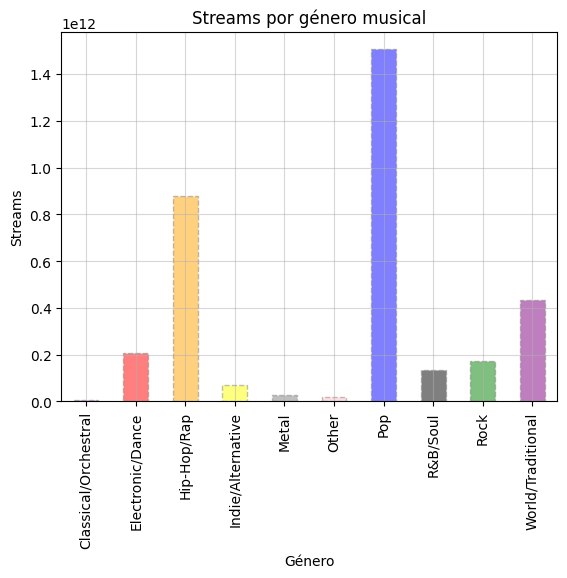

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

genero_escuchado = df.groupby("main_genre")["Streams"].sum()
# Crear el gráfico de barras editandolo y incluyendo colores
genero_escuchado.plot(kind='bar', color=["purple", "red", "orange", "yellow", "grey", "pink", "blue", "black", "green"], alpha=0.5, edgecolor="grey", linestyle="--")
plt.xlabel("Género")
plt.ylabel("Streams")
plt.xticks(rotation=90)
#Agregar cuadrícula
plt.grid(True, alpha=0.5)
plt.title("Streams por género musical")
plt.show()

# STREAMS TOTALES DE LOS 10 ARTISTAS MAS ESCUCHADOS

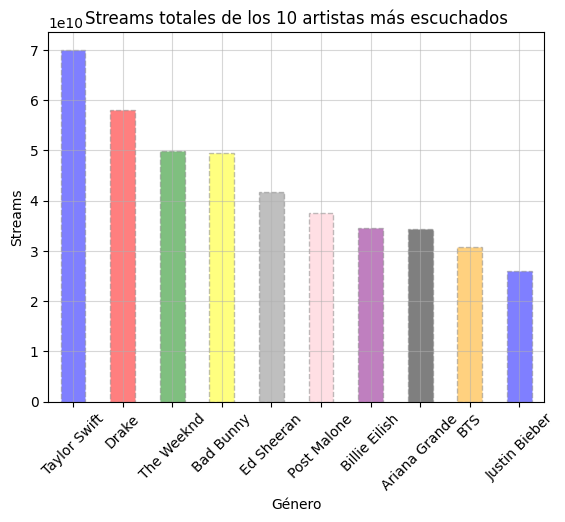

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

streams_artistas=df.groupby("Artist")["Streams"].sum().nlargest(10)
# Crear el gráfico de barras editandolo y incluyendo colores
streams_artistas.plot(kind='bar', color=["blue", "red", "green", "yellow", "grey", "pink", "purple", "black", "orange"], alpha=0.5, edgecolor="grey", linestyle="--")
plt.xlabel("Género")
plt.ylabel("Streams")
plt.xticks(rotation=45)
#Agregar cuadrícula
plt.grid(True, alpha=0.5)
plt.title("Streams totales de los 10 artistas más escuchados")
plt.show()

# STREAMS DEL POP EN LOS ULTIMOS 10 AÑOS

<ipython-input-34-bef8afe54bd4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


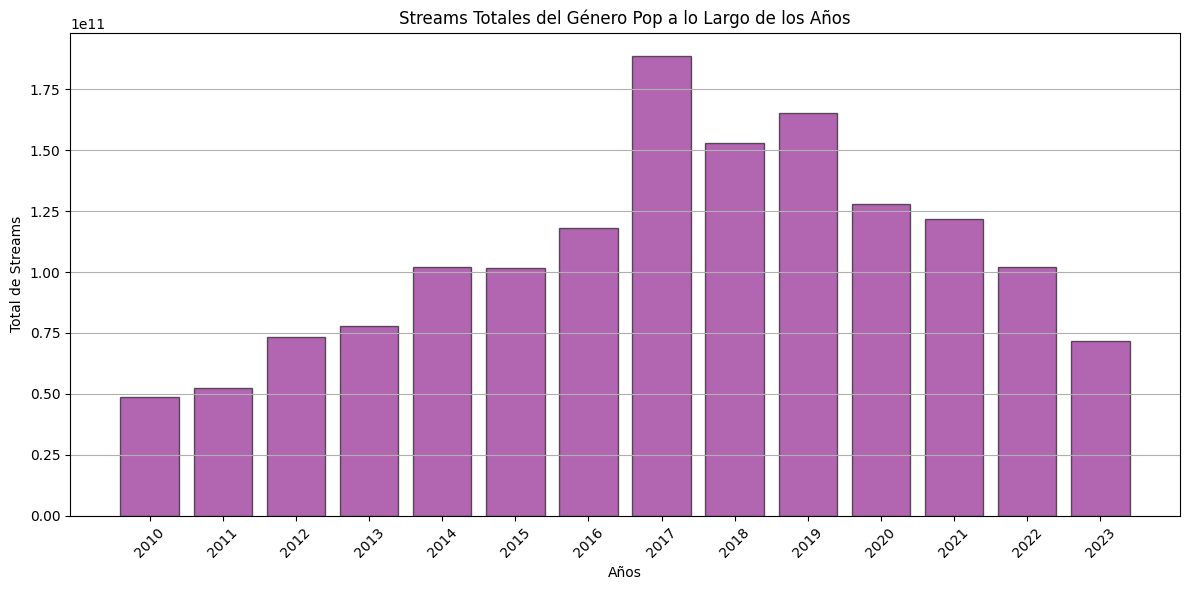

In [ ]:
import matplotlib.pyplot as plt

#Agrupar los datos por género y año
genero_escuchado = df.groupby(["main_genre", "year"])["Streams"].sum().reset_index()

#Filtrar los datos para el género 'Pop'
data = genero_escuchado[genero_escuchado['main_genre'] == 'Pop']

#Asegurarse de que los años son numéricos
data['year'] = data['year'].astype(int)

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(data['year'], data['Streams'], color='purple', edgecolor='black', alpha=0.6)
plt.xlabel('Años')
plt.ylabel('Total de Streams')
plt.title('Streams Totales del Género Pop a lo Largo de los Años')
plt.xticks(data['year'], rotation=45)  #Para que los años se muestren en el eje x
plt.grid(axis='y')

#Mostrar el gráfico
plt.tight_layout()  #Ajusta el diseño para que no se corten etiquetas
plt.show()


# STREAMS DEL HIP-HOT DE LOS ULTIMOS 10 AÑOS

<ipython-input-40-ea534daae00d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


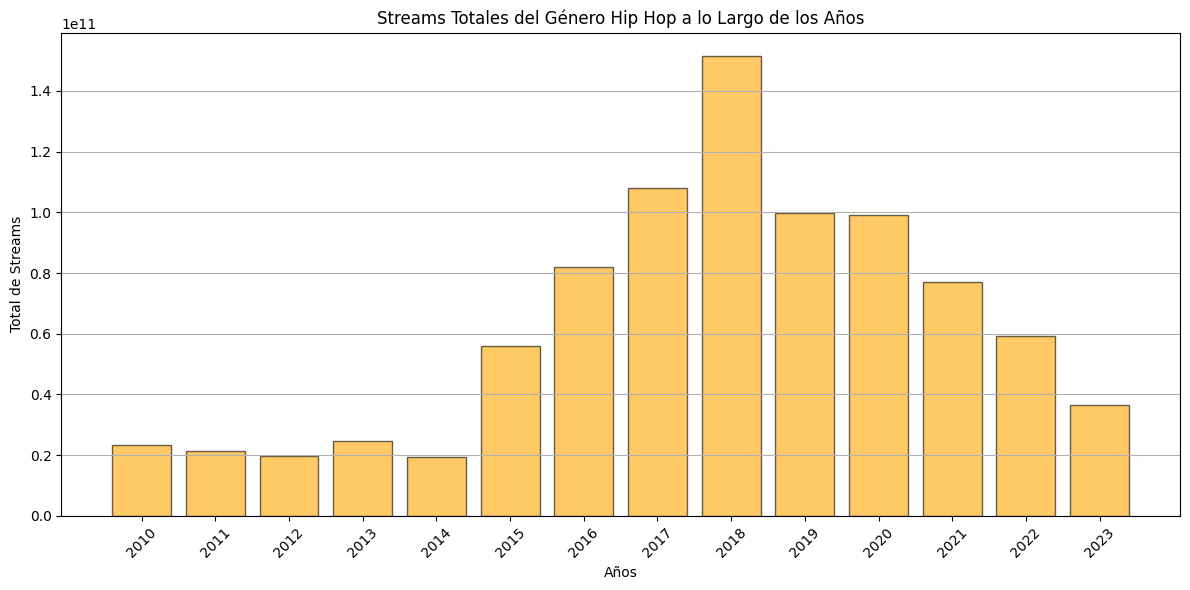

<Figure size 640x480 with 0 Axes>

In [ ]:
#Agrupar los datos por género y año
genero_escuchado = df.groupby(["main_genre", "year"])["Streams"].sum().reset_index()

#Filtrar los datos para el género 'Pop'
data = genero_escuchado[genero_escuchado['main_genre'] == 'Hip-Hop/Rap']

#Asegurarse de que los años son numéricos
data['year'] = data['year'].astype(int)

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(data['year'], data['Streams'], color='orange', edgecolor='black', alpha=0.6)
plt.xlabel('Años')
plt.ylabel('Total de Streams')
plt.title('Streams Totales del Género Hip Hop a lo Largo de los Años')
plt.xticks(data['year'], rotation=45)  #Para que los años se muestren en el eje x
plt.grid(axis='y')

#Mostrar el gráfico
plt.tight_layout()  #Ajusta el diseño para que no se corten etiquetas
plt.show()
plt.savefig("Streams totales del Hip Hop a lo largo de los años.pdf")
plt.show()

# COMPARACION ENTRE LOS 5 GENEROS MAS ESCUCHADOS

Para crear los graficos circulares agregaremos ademas la funcion "zizes" que Determina el tamaño de cada porción del gráfico y "labels" Asigna etiquetas a cada porción del gráfico por ultimo "autopct" nos ayuda con los percentajes.

<ipython-input-35-b99e3184536a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [cinco_generos[0], cinco_generos[1], cinco_generos[2], cinco_generos[3], cinco_generos[4]]


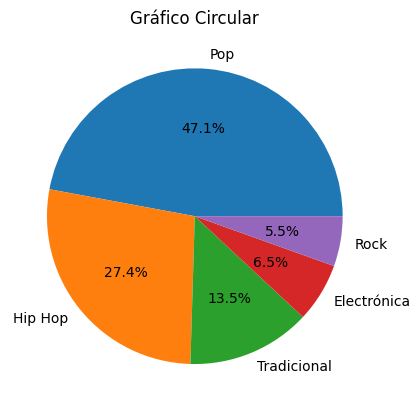

In [ ]:
import matplotlib.pyplot as plt

genero_mas_escuchado=df.groupby("main_genre")["Streams"].sum()
cinco_generos=genero_mas_escuchado.nlargest(5)

labels = ['Pop', 'Hip Hop', 'Tradicional', 'Electrónica', "Rock"]

sizes = [cinco_generos[0], cinco_generos[1], cinco_generos[2], cinco_generos[3], cinco_generos[4]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Gráfico Circular')
plt.show()

# COMPARACION DE STREAMS DE LOS DOS ARTISTAS MAS ESCUCHADOS

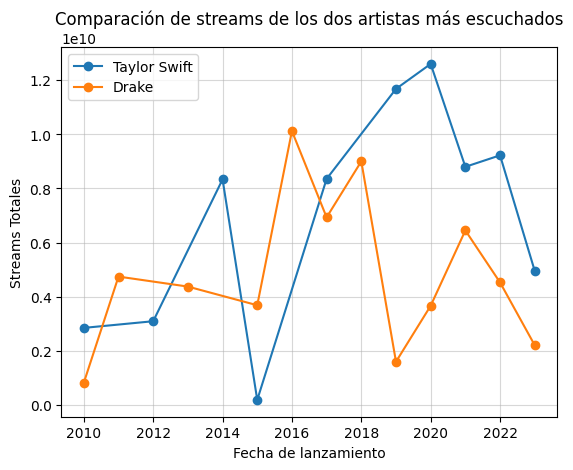

In [ ]:
import matplotlib.pyplot as plt

# Obtener los dos artistas más escuchados
streams_artistas = df.groupby("Artist")["Streams"].sum()
mayores_streams = streams_artistas.nlargest(2)
#tolist= pasar de lista pandas a lista python
top_artistas = mayores_streams.index.tolist()

# Filtrar el DataFrame para incluir solo los dos artistas principales
df_filtrado = df[df["Artist"].isin(top_artistas)]

#Agrupar por artista y fecha de lanzamiento y sumar streams
streams_por_fecha = df_filtrado.groupby(["Artist", "year"])["Streams"].sum().reset_index()

#Gráfica
fig, ax = plt.subplots()

for artista in top_artistas:
  artista_df = streams_por_fecha[streams_por_fecha["Artist"] == artista]
  ax.plot(artista_df["year"], artista_df["Streams"], label=artista, marker="o")

#Nombrar etiquetas y título
ax.set_xlabel("Fecha de lanzamiento")
ax.set_ylabel("Streams Totales")
ax.set_title("Comparación de streams de los dos artistas más escuchados")
ax.legend()
plt.grid(True, alpha= 0.5)
#Mostrar la gráfica
plt.show()

# INTRODUCION AL API

Este código permite interactuar con el API de Spotify para obtener información sobre artistas, específicamente buscando detalles como su popularidad, nombre y enlace a su perfil en Spotify.

In [ ]:
!pip install requests
import requests
import base64

# Credenciales de tu aplicación
CLIENT_ID = 'd25d5737dc0b450882623ddd8f60c9b4'
CLIENT_SECRET = '176b7a0dcfd84fe4ae9a1c474bbcf207'

# Función para obtener el token de acceso
def obtener_token():
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': 'Basic ' + base64.b64encode(f'{"d25d5737dc0b450882623ddd8f60c9b4"}:{"176b7a0dcfd84fe4ae9a1c474bbcf207"}'.encode()).decode(),
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    data = {
        'grant_type': 'client_credentials'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.json()['access_token']

# Función para buscar información del artista
def buscar_artista(artista, token):
    url = f'https://api.spotify.com/v1/search?q={artista}&type=artist'
    headers = {
        'Authorization': f'Bearer {token}'
    }
    response = requests.get(url, headers=headers)
    return response.json()

# Main
if __name__ == "__main__":
    token = obtener_token()
    artista = input("Ingresa el nombre del artista que deseas buscar: ")
    info_artista = buscar_artista(artista, token)

    # Mostrar resultados
    if info_artista['artists']['items']:
        artista_info = info_artista['artists']['items'][0]
        print(f"Nombre: {artista_info['name']}")
        print(f"Popularidad: {artista_info['popularity']}")
        print(f"Enlace: {artista_info['external_urls']['spotify']}")
    else:
        print("No se encontró información sobre el artista.")

KeyboardInterrupt: Interrupted by user